In [35]:
import pandas as pd
import matplotlib.pyplot as plt
# import scipy.integrate.solve_ivp as solve_ivp
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML


In [36]:
def euler_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Euler's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Euler's numerical approximation of the next function value f(x1)
    """
    x = x0 + k * f(x0, y0, t0)
    return x

def heun_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Heun's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Heun's numerical approximation of the next function value f(x1)
    """
    x1_temp = euler_method(x0, y0, k, t0, f)
    y1_temp = euler_method(x0, y0, k, t0, f)
    x = x0 + k / 2 * (f(x0, y0, t0) + f(x1_temp, y1_temp, t0 + k))
    return x

In [37]:
# Starting from scratch
def acceleration(x1, y1, x2, y2, x3, y3):
    """Returns tuple of acceleration of an object with position (x1, y1) due to the gravitational force of two other objects with positions (x2, y2) and (x3, y3).

    Args:
        x1 (_type_): current object's x position
        y1 (_type_): 
        x2 (_type_): _description_
        y2 (_type_): _description_
        x3 (_type_): _description_
        y3 (_type_): _description_

    Returns:
        _type_: _description_
    """
    return - ((x1 - x2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((x1 - x3)/((x1-x3)**2+(y1-y3)**2)**(3/2)), - ((y1 - y2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((y1 - y3)/((x1-x3)**2+(y1-y3)**2)**(3/2))

def velocity(v0x, v0y, ax, ay, t):
    return (v0x + ax * t, v0y + ay * t)

def position(x0, y0, v0x, v0y, ax, ay, t):
    return (x0 + v0x * t + 1/2 * ax * t**2, y0 + v0y * t + 1/2 * ay * t**2)

def plot3Body(p1: tuple, p2: tuple, p3: tuple, v1: tuple, v2: tuple, v3: tuple, k: float, t: float, fignum: int = 1) -> tuple:
    """Returns a tuple of the position, velocity, and acceleration visualizations, along with the dataframe. 

    Args:
        p1 (tuple): x and y position of object 1
        p2 (tuple): x and y position of object 2
        p3 (tuple): x and y position of object 3
        v1 (tuple): vx and vy velocity of object 1
        v2 (tuple): vx and vy velocity of object 2
        v3 (tuple): vx and vy velocity of object 3
        k (float): step size
        t (float): end time

    Returns:
        tuple: (figure, dataframe)
    """
    df = pd.DataFrame(columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
    
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    x3 = p3[0]
    y3 = p3[1]
    vx1 = v1[0]
    vy1 = v1[1]
    vx2 = v2[0]
    vy2 = v2[1]
    vx3 = v3[0]
    vy3 = v3[1]
    for i in range(0, t):
        time = i * k
        ax1, ay1 = acceleration(x1, y1, x2, y2, x3, y3)
        ax2, ay2 = acceleration(x2, y2, x1, y1, x3, y3)
        ax3, ay3 = acceleration(x3, y3, x1, y1, x2, y2)
        vx1, vy1 = velocity(vx1, vy1, ax1, ay1, time)
        vx2, vy2 = velocity(vx2, vy2, ax2, ay2, time)
        vx3, vy3 = velocity(vx3, vy3, ax3, ay3, time)
        x1, y1 = position(x1, y1, vx1, vy1, ax1, ay1, time)
        x2, y2 = position(x2, y2, vx2, vy2, ax2, ay2, time)
        x3, y3 = position(x3, y3, vx3, vy3, ax3, ay3, time)
        data = [time, x1, y1, vx1, vy1, ax1, ay1, x2, y2, vx2, vy2, ax2, ay2, x3, y3, vx3, vy3, ax3, ay3]
        df2 = pd.DataFrame([data], columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
        df = pd.concat([df, df2], ignore_index=True)

    plt.figure(fignum)
    plt.subplot(421)
    plt.title("y vs x")
    plt.scatter(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.scatter(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.scatter(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.scatter(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.scatter(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.scatter(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(422)
    plt.plot(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(423)
    plt.title('X Position')
    plt.plot(df['time'][0], df['x1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['x2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['x3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['x1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['x2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['x3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('x')

    plt.subplot(424)
    plt.title('Y Position')
    plt.plot(df['time'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('y')

    plt.subplot(425)
    plt.title('X Velocity')
    plt.plot(df['time'][0], df['vx1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['vx2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['vx3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['vx1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['vx2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['vx3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('vx')
    
    plt.subplot(426)
    plt.title('Y Velocity')
    plt.plot(df['time'][0], df['vy1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['vy2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['vy3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['vy1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['vy2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['vy3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('vy')
    
    plt.subplot(427)
    plt.title('X Acceleration')
    plt.plot(df['time'][0], df['ax1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['ax2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['ax3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['ax1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['ax2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['ax3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('ax')
    
    plt.subplot(428)
    plt.title('Y Acceleration')
    plt.plot(df['time'][0], df['ay1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['ay2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['ay3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['ay1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['ay2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['ay3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('ay')

    plt.subplots_adjust(hspace=1.4, wspace=0.5)
    return (plt.figure(1), df)   

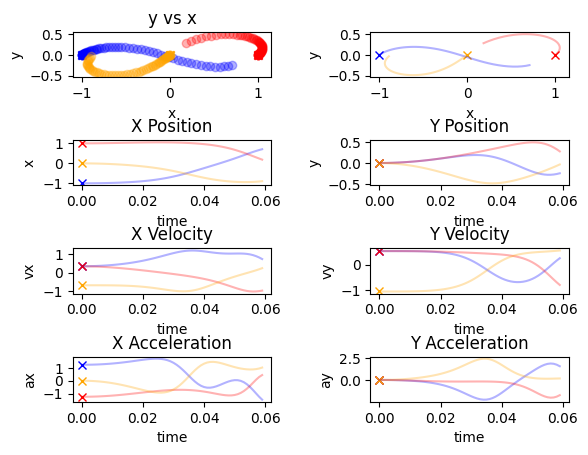

,time,x1,y1,vx1,vy1,ax1,ay1,x2,y2,vx2,vy2,ax2,ay2,x3,y3,vx3,vy3,ax3,ay3
0,0.000,-1.000000,0.000000,0.347113,0.532727,1.250000,-0.000000,1.000000,0.000000,0.347113,0.532727,-1.250000,-0.000000,0.000000,0.000000,-0.694226,-1.065454,0.000000,-0.000000
1,0.001,-0.999651,0.000533,0.348363,0.532727,1.250000,-0.000000,1.000345,0.000533,0.345863,0.532727,-1.250000,-0.000000,-0.000694,-0.001065,-0.694226,-1.065454,0.000000,-0.000000
2,0.002,-0.998947,0.001598,0.350867,0.532724,1.252087,-0.001603,1.001029,0.001598,0.343367,0.532724,-1.247921,-0.001593,-0.002083,-0.003196,-0.694234,-1.065448,-0.004165,0.003196
3,0.003,-0.997877,0.003196,0.354636,0.532709,1.256273,-0.004840,1.002043,0.003196,0.339636,0.532710,-1.243776,-0.004750,-0.004166,-0.006393,-0.694272,-1.065419,-0.012496,0.009590
4,0.004,-0.996428,0.005327,0.359686,0.532670,1.262575,-0.009771,1.003372,0.005327,0.334685,0.532672,-1.237583,-0.009411,-0.006943,-0.010654,-0.694372,-1.065342,-0.024992,0.019182
5,0.005,-0.994582,0.007990,0.366041,0.532588,1.271017,-0.016489,1.004999,0.007990,0.328539,0.532594,-1.229368,-0.015490,-0.010417,-0.015979,-0.694580,-1.065182,-0.041649,0.031979
6,0.006,-0.992317,0.011184,0.373731,0.532437,1.281624,-0.025122,1.006904,0.011184,0.321224,0.532457,-1.219162,-0.022875,-0.014588,-0.022368,-0.694955,-1.064894,-0.062462,0.047997
7,0.007,-0.989606,0.014908,0.382792,0.532186,1.294425,-0.035834,1.009064,0.014909,0.312775,0.532237,-1.207009,-0.031427,-0.019459,-0.029817,-0.695567,-1.064423,-0.087415,0.067261
8,0.008,-0.986418,0.019161,0.393268,0.531796,1.309445,-0.048827,1.011452,0.019163,0.303231,0.531909,-1.192963,-0.040991,-0.025034,-0.038324,-0.696499,-1.063705,-0.116482,0.089818
9,0.009,-0.982717,0.023939,0.405208,0.531216,1.326706,-0.064348,1.014038,0.023944,0.292637,0.531447,-1.177090,-0.051390,-0.031321,-0.047883,-0.697845,-1.062663,-0.149616,0.115738


In [38]:
p, df = plot3Body((-1, 0), (1, 0), (0, 0), (0.347113, 0.532727), (0.347113, 0.532727), (-0.694226, -1.065454), 0.001, 60)
# q, df2 = plot3Body((-1, 0), (1, 0), (0, 0), (0.405043, 0.492281), (0.405043, 0.492281), (-0.810086, -0.984562), 0.001, 80, 2)
plt.show()
df

In [39]:
def heun(p0: np.array, N: int, t: float) -> np.array:
    """Calculatue heuns method for the three body problem for N steps with step size t.

    Args:
        p0 (np.array): 12 dimensional vector of initial conditions corresponding to the following:
            p0[0] = x1, p0[1] = x2, p0[2] = x3, p0[3] = y1, p0[4] = y2, p0[5] = y3, 
            p0[6] = vx1, p0[7] = vx2, p0[8] = vx3, p0[9] = vy1, p0[10] = vy2, p0[11] = vy3
        N (int): number of steps
        t (float): step size

    Returns:
        np.array: np.array positions and velocities for each x and y of each planet
    """
    data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], 
            p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], 
            derivative(p0)[9], derivative(p0)[10], derivative(p0)[11]]
    df = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
    # TODO: verify times and step sizes are correct
    for i in range(0, N):
        ptemp = p0 + t * derivative(p0)
        dp0 = derivative(p0)
        dptemp = derivative(ptemp)
        p0 = p0 + t/2 * (dp0 + dptemp)
        data = [p0[0], p0[1], p0[2], p0[3], p0[4], p0[5], p0[6], p0[7], p0[8], p0[9], p0[10], p0[11], 
            derivative(p0)[6], derivative(p0)[7], derivative(p0)[8], derivative(p0)[9], derivative(p0)[10], 
            derivative(p0)[11]]
        df2 = pd.DataFrame(data=[data], columns=['P1: X Position', 'P2: X Position', 
                                'P3: X Position', 'P1: Y Position', 'P2: Y Position', 
                                'P3: Y Position', 'P1: X Velocity', 'P2: X Velocity', 
                                'P3: X Velocity', 'P1: Y Velocity', 'P2: Y Velocity', 
                                'P3: Y Velocity', 'P1: X Acceleration', 'P2: X Acceleration', 
                                'P3: X Acceleration', 'P1: Y Acceleration', 'P2: Y Acceleration', 
                                'P3: Y Acceleration'])
        df2['P1: X Position'] = p0[0]
        df2['P2: X Position'] = p0[1]
        df2['P3: X Position'] = p0[2]
        df2['P1: Y Position'] = p0[3]
        df2['P2: Y Position'] = p0[4]
        df2['P3: Y Position'] = p0[5]
        df2['P1: X Velocity'] = p0[6]
        df2['P2: X Velocity'] = p0[7]
        df2['P3: X Velocity'] = p0[8]
        df2['P1: Y Velocity'] = p0[9]
        df2['P2: Y Velocity'] = p0[10]
        df2['P3: Y Velocity'] = p0[11]
        df = pd.concat([df, df2], ignore_index=True)
    
    df.insert(0, 'Time', [i * t for i in range(0, N + 1)])
    return df


def derivative(p0: np.array):
    p1 = 0 * p0
    p1[0] = p0[6]
    p1[1] = p0[7]
    p1[2] = p0[8]
    p1[3] = p0[9]
    p1[4] = p0[10]
    p1[5] = p0[11]
    p1[6] = - ((p0[0] - p0[1])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[0] - p0[2])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[7] = - ((p0[1] - p0[0])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[1] - p0[2])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[8] = - ((p0[2] - p0[0])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[2] - p0[1])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    p1[9] = - ((p0[3] - p0[4])/((p0[0]-p0[1])**2+(p0[3]-p0[4])**2)**(3/2)) - ((p0[3] - p0[5])/((p0[0]-p0[2])**2+(p0[3]-p0[5])**2)**(3/2))
    p1[10] = - ((p0[4] - p0[3])/((p0[1]-p0[0])**2+(p0[4]-p0[3])**2)**(3/2)) - ((p0[4] - p0[5])/((p0[1]-p0[2])**2+(p0[4]-p0[5])**2)**(3/2))
    p1[11] = - ((p0[5] - p0[3])/((p0[2]-p0[0])**2+(p0[5]-p0[3])**2)**(3/2)) - ((p0[5] - p0[4])/((p0[2]-p0[1])**2+(p0[5]-p0[4])**2)**(3/2))
    return p1

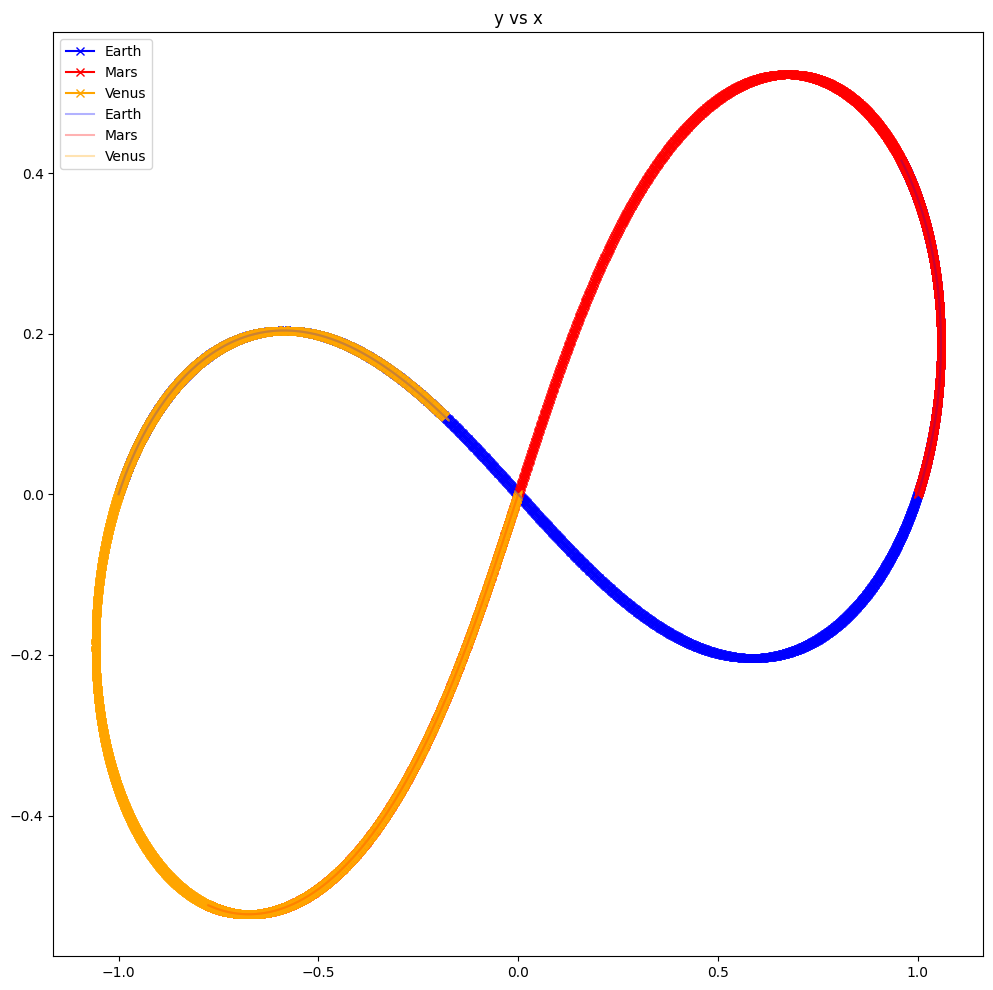

In [40]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.347113, 0.347113, -0.694226, 0.532727, 0.532727, -1.065454])
d = heun(p, 3000, 0.001)

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

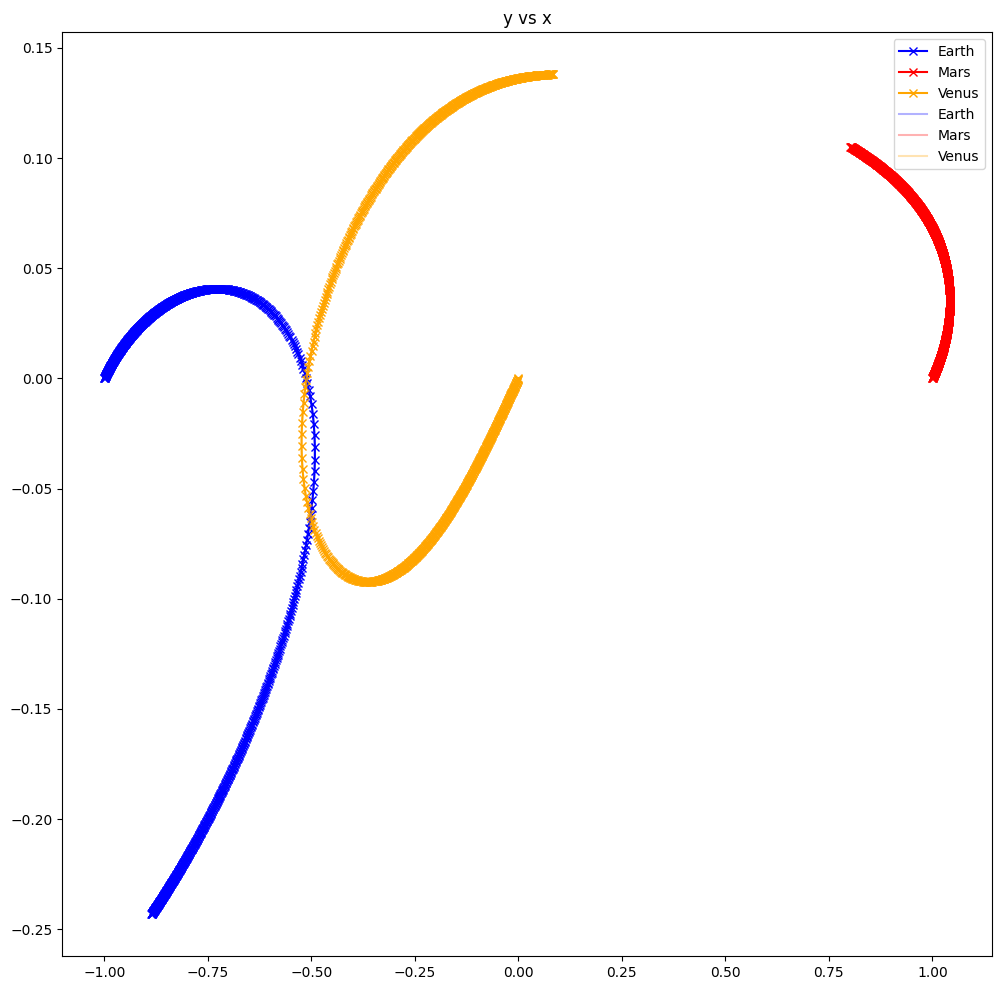

In [41]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.306893, 0.306893, -0.613786, 0.125507, 0.125507, -0.251014])
d = heun(p, 1000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

In [42]:
p = np.array([-0.9892620043, 2.2096177241, 1.2203557197, 0, 0, 0, 0, 0, 0, 1.9169244185, 0.1910268738, 2.1079512924])
d = heun(p, 50000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

KeyboardInterrupt: 

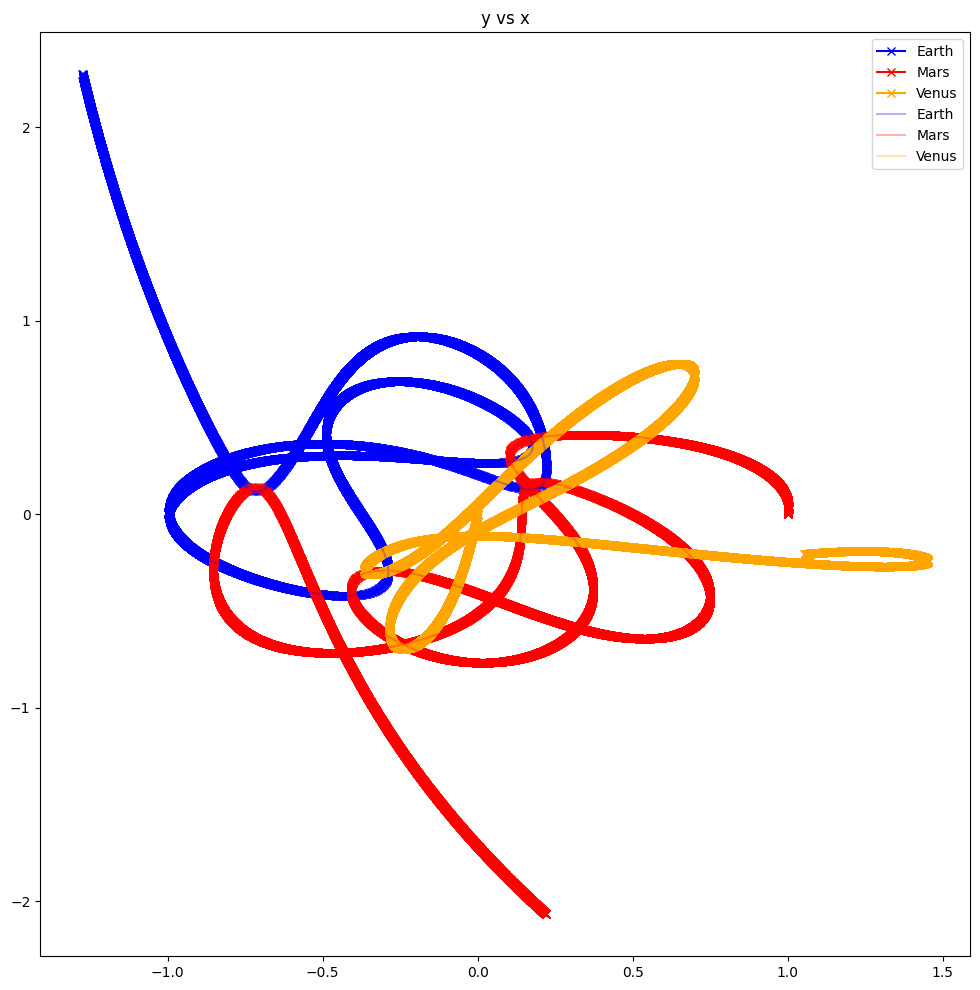

In [ ]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.080584, 0.080584, -0.161168, 0.532727, 0.532727, -1.065454])
d = heun(p, 10000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

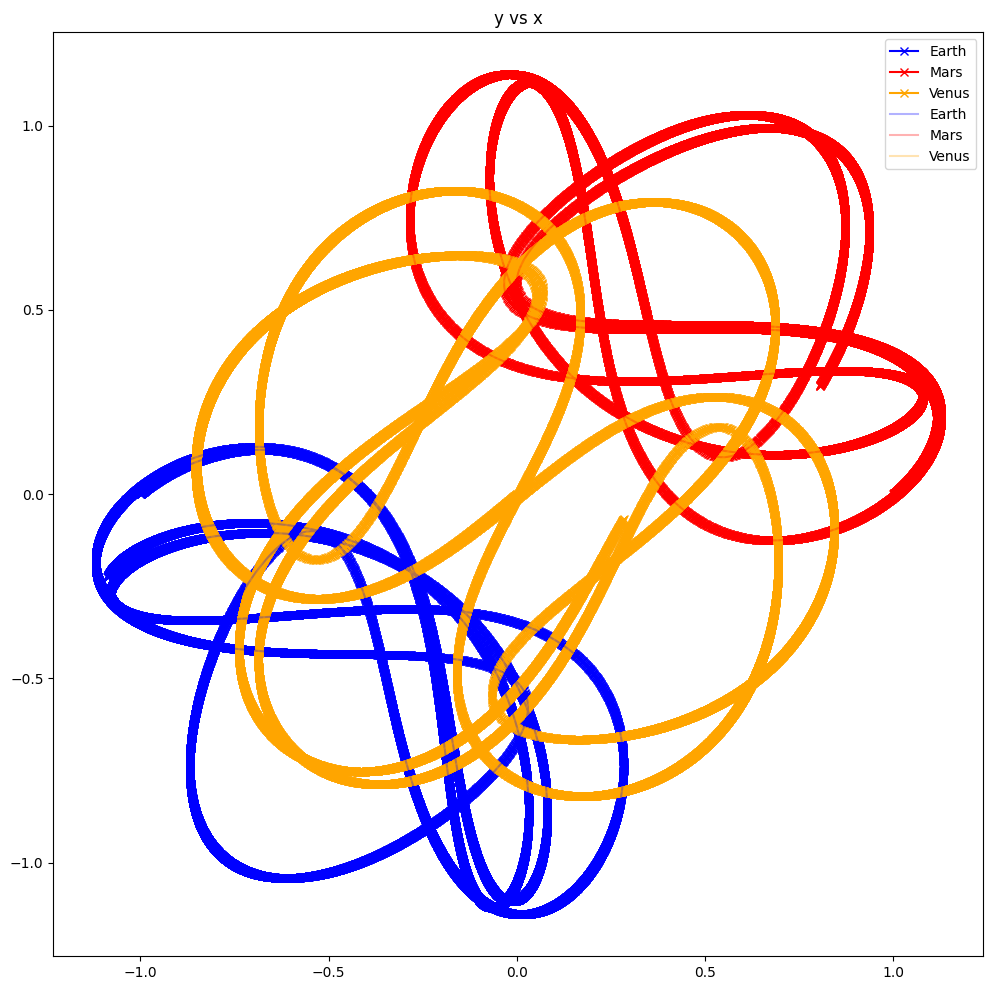

In [45]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.464445, 0.464445, -0.92889, 0.39606, 0.39606, -0.79212])
d = heun(p, 20000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()

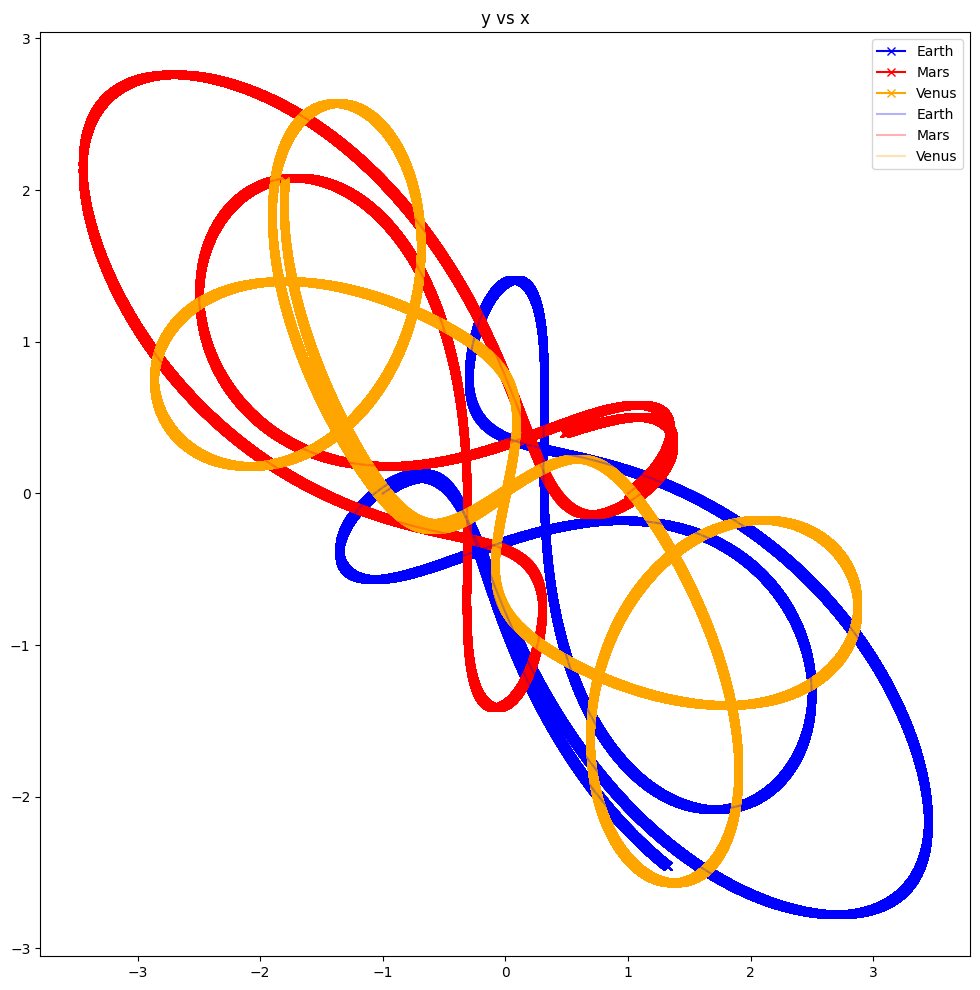

In [49]:
p = np.array([-1, 1, 0, 0, 0, 0, 0.7001954713173643, 0.7001954713173643, -1.4003909426347285, 0.407171853051058, 0.407171853051058, -0.814343706102116])
d = heun(p, 50000, 0.001)
fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("y vs x")
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', marker='x', label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', marker='x',label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', marker='x', label='Venus')
ax.plot(d['P1: X Position'], d['P1: Y Position'], c='blue', alpha=0.3, label='Earth')
ax.plot(d['P2: X Position'], d['P2: Y Position'], c='red', alpha=0.3, label='Mars')
ax.plot(d['P3: X Position'], d['P3: Y Position'], c='orange', alpha=0.3, label='Venus')
ax.legend()
plt.show()